In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wrangle import wrangle_fires

In [2]:
# wrangle data
fires = wrangle_fires()
fires.head()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,25,26,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,fire_year,discovery_date,general_cause,cont_date,fire_size,latitude,longitude,state
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,38.984167,-120.735556,CA
3,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.913333,CA
4,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.933056,CA


# Exploration

**Initial Questions**

- Are wildfires more destructive now than they were in the past? 

- What are the most common causes of wildfires? 

- Is there anything that can be done to prevent that?

In [3]:
fires.fire_size.value_counts(normalize = True)


0.100        2.493639e-01
1.000        1.172169e-01
0.500        5.800523e-02
2.000        5.577655e-02
0.200        3.774542e-02
                 ...     
10484.000    4.615201e-07
2.011        4.615201e-07
220.800      4.615201e-07
232.400      4.615201e-07
209.600      4.615201e-07
Name: fire_size, Length: 17055, dtype: float64

In [4]:
fires.fire_year.value_counts(normalize = True)



2006    0.054433
2011    0.045646
2007    0.045615
2000    0.044489
2005    0.042885
1999    0.041237
2008    0.040755
2001    0.040153
2010    0.039496
2017    0.037973
2016    0.037842
2009    0.037610
2018    0.037320
2015    0.035664
2002    0.035135
1994    0.035044
1996    0.034873
2012    0.034272
1995    0.032971
2014    0.032528
2004    0.032016
1998    0.031548
2003    0.031510
1992    0.031365
2013    0.030661
1993    0.028603
1997    0.028357
Name: fire_year, dtype: float64

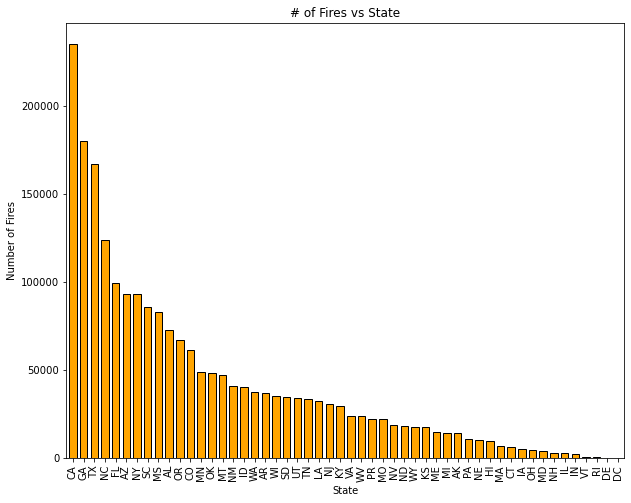

In [5]:
# plot data for fires vs state

fig = plt.figure(figsize=(10, 8))
ax = fires.state.value_counts().plot.bar(width=.7, ec='black', color='orange')
ax.set(title='# of Fires vs State', ylabel='Number of Fires', xlabel='State')
plt.savefig("Dist.png")

In [7]:
sorted_df = fires.sort_values(by=['fire_year'], ascending=True)
sorted_df

,fire_year,discovery_date,general_cause,cont_date,fire_size,latitude,longitude,state
696811,1992,1992-05-17,Arson/incendiarism,1992-05-17,2.0000,31.023204,-89.452709,MS
762318,1992,1992-06-14,Debris and open burning,NaT,0.1000,45.637770,-122.241150,WA
762317,1992,1992-06-16,Debris and open burning,NaT,0.1000,45.723490,-121.592050,WA
762316,1992,1992-09-15,Smoking,NaT,2.1000,47.515890,-122.899630,WA
762315,1992,1992-09-10,Other causes,NaT,1.0000,47.441770,-122.830120,WA
...,...,...,...,...,...,...,...,...
2097751,2018,2018-02-04,Missing data/not specified/undetermined,2018-02-04,0.0250,41.144960,-73.934180,NY
2097750,2018,2018-02-04,Missing data/not specified/undetermined,2018-02-04,0.0010,38.490000,-105.324800,CO
2097749,2018,2018-02-04,Missing data/not specified/undetermined,2018-02-04,0.1000,39.124090,-95.637404,KS
2097759,2018,2018-02-04,Missing data/not specified/undetermined,2018-02-04,1.1000,33.990200,-109.188000,AZ


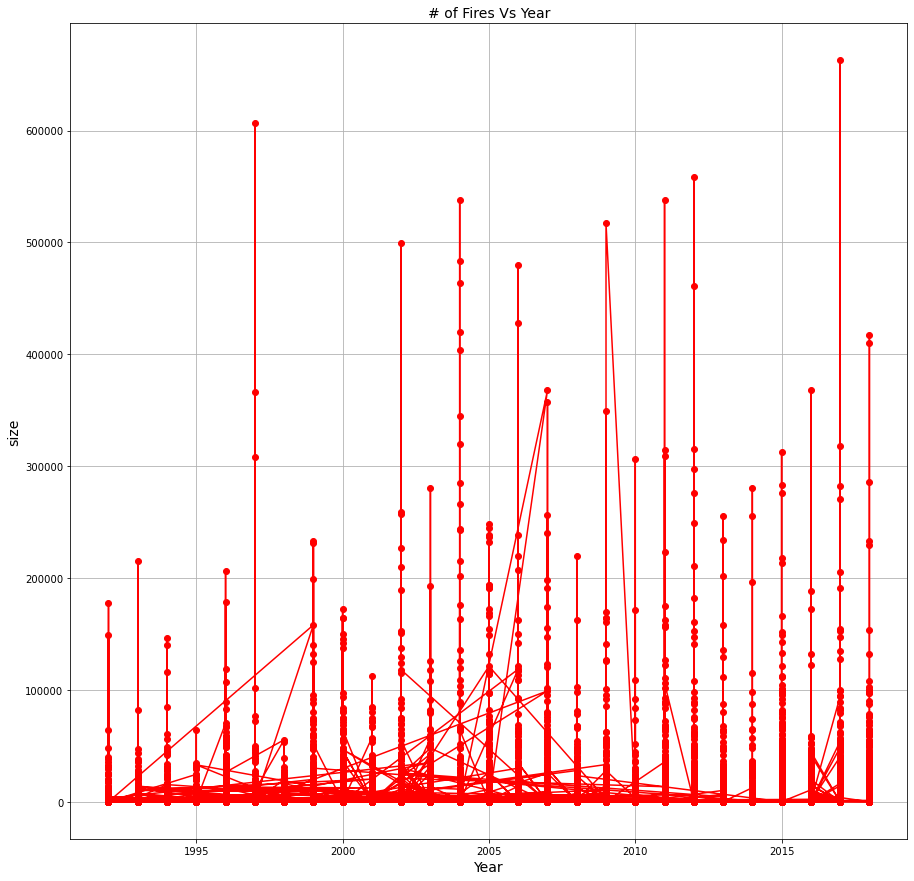

In [25]:
x = fires.fire_year
y = fires.fire_size

fig = plt.figure(figsize=(15, 15))
plt.plot(x, y, color='red', marker='o')
plt.title('# of Fires Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('size', fontsize=14)
plt.grid(True)
plt.show()

